In [48]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import collections
import mglearn
import matplotlib.pyplot as plt
import random

import warnings
warnings.filterwarnings(action='ignore') 

random.seed(2020)

In [2]:
# 데이터 정규화
# Age, BMI,  Glucose, Insulin	HOMA	Leptin	Adiponectin	Resistin	MCP.1	Classification
def standardization(Data):
    Input = ((Data[['Age', 'BMI','Glucose','Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']] -
                   np.mean(Data[['Age', 'BMI','Glucose','Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']], axis=0)) / 
                   np.std(Data[['Age', 'BMI','Glucose','Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']], axis=0))
    return Input
    #return(pd.concat([Input, Data['Classification']], axis=1))
    
    

In [3]:
# 데이터 로드
data = pd.read_csv('dataR2.csv')
data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [4]:
data2 = data.drop(['Classification'], axis=1)

In [52]:
standard_data = standardization(data2)
standard_data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,-0.579794,-0.816675,-1.239222,-0.728739,-0.614282,-0.932334,-0.070222,-0.545517,-0.341251
1,1.601821,-1.378751,-0.258299,-0.688038,-0.548240,-0.930413,-0.697350,-0.864214,-0.191224
2,1.539489,-0.891764,-0.302887,-0.550073,-0.464752,-0.454219,1.797998,-0.441660,0.058214
3,0.666843,-1.243303,-0.927110,-0.676965,-0.574210,-0.876021,-0.441945,-0.158867,1.142718
4,1.788816,-1.294601,-0.258299,-0.644743,-0.521081,-1.042682,-0.786881,-0.336352,0.694716


In [6]:
model = KMeans(n_clusters = 2, random_state = 2022)
model.fit(standard_data)

KMeans(n_clusters=2, random_state=2022)

In [13]:
pca = PCA(n_components=2)
result = pca.fit_transform(standard_data)

result = pd.DataFrame(result, columns=["x", "y"])

In [14]:
result

,x,y
0,-1.992785,0.125612
1,-1.328830,0.247930
2,-1.217244,0.992393
3,-1.199203,-0.272409
4,-0.898467,-0.143089
...,...,...
111,-0.651096,-0.334463
112,-1.267058,0.971953
113,-0.064035,-0.098318
114,-1.898629,1.562120


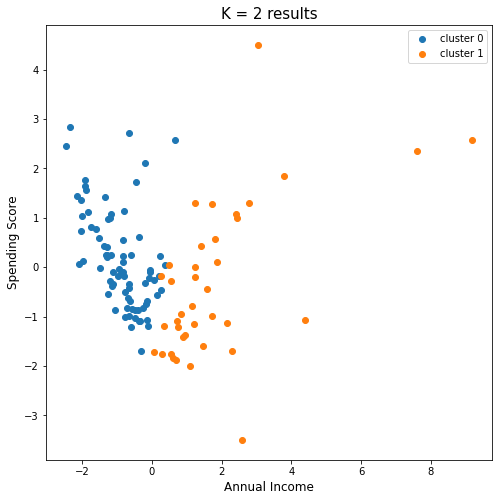

In [15]:
result2 = result
result2['cluster'] = model.fit_predict(standard_data)
result2

plt.figure(figsize = (8, 8))
k=2
for i in range(k):
    plt.scatter(result2.loc[result2['cluster'] == i, 'x'],
                result2.loc[result2['cluster'] == i, 'y'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('Annual Income', size = 12)
plt.ylabel('Spending Score', size = 12)
plt.show()

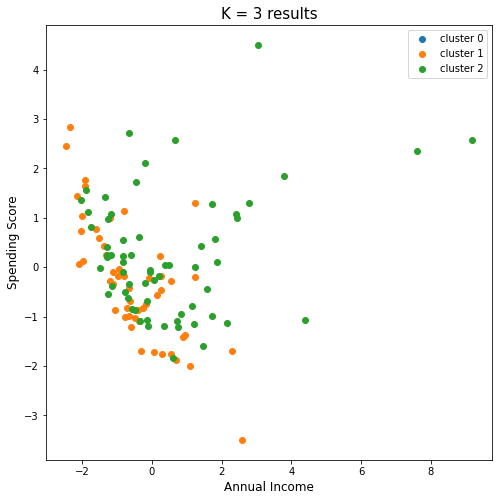

In [11]:
result_correct = result
result_correct['cluster'] = data['Classification'].values

plt.figure(figsize = (8, 8))
k=3
for i in range(k):
    plt.scatter(result_correct.loc[result_correct['cluster'] == i, 'x'],
                result_correct.loc[result_correct['cluster'] == i, 'y'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('Annual Income', size = 12)
plt.ylabel('Spending Score', size = 12)
plt.show()

In [12]:
result

,x,y,cluster
0,-1.992785,0.125612,1
1,-1.328830,0.247930,1
2,-1.217244,0.992393,1
3,-1.199203,-0.272409,1
4,-0.898467,-0.143089,1
...,...,...,...
111,-0.651096,-0.334463,2
112,-1.267058,0.971953,2
113,-0.064035,-0.098318,2
114,-1.898629,1.562120,2


In [18]:
standard_data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,-0.579794,-0.816675,-1.239222,-0.728739,-0.614282,-0.932334,-0.070222,-0.545517,-0.341251
1,1.601821,-1.378751,-0.258299,-0.688038,-0.548240,-0.930413,-0.697350,-0.864214,-0.191224
2,1.539489,-0.891764,-0.302887,-0.550073,-0.464752,-0.454219,1.797998,-0.441660,0.058214
3,0.666843,-1.243303,-0.927110,-0.676965,-0.574210,-0.876021,-0.441945,-0.158867,1.142718
4,1.788816,-1.294601,-0.258299,-0.644743,-0.521081,-1.042682,-0.786881,-0.336352,0.694716
...,...,...,...,...,...,...,...,...,...
111,-0.766789,-0.146468,-0.258299,-0.666590,-0.534786,1.469335,0.281654,-0.305255,-0.773527
112,0.292852,-0.148468,0.098400,-0.546881,-0.435039,-0.741611,1.649470,-0.600299,-0.593717
113,0.479848,0.893855,-0.035362,-0.427172,-0.365106,1.825348,1.813843,-0.356320,-0.640491
114,0.916171,-0.398546,-0.704173,-0.717467,-0.585883,-0.086651,3.459038,-0.928577,-0.412832


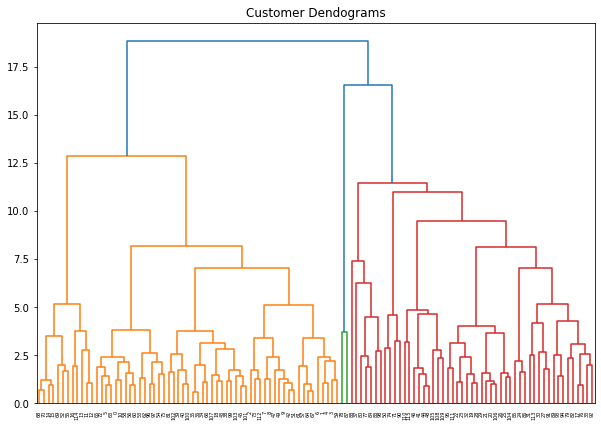

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(standard_data, method='ward'))

In [19]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
result_hierarchy = result
result_hierarchy['cluster'] = cluster.fit_predict(standard_data)
result_hierarchy

,x,y,cluster
0,-1.992785,0.125612,1
1,-1.328830,0.247930,1
2,-1.217244,0.992393,1
3,-1.199203,-0.272409,1
4,-0.898467,-0.143089,1
...,...,...,...
111,-0.651096,-0.334463,0
112,-1.267058,0.971953,1
113,-0.064035,-0.098318,0
114,-1.898629,1.562120,1


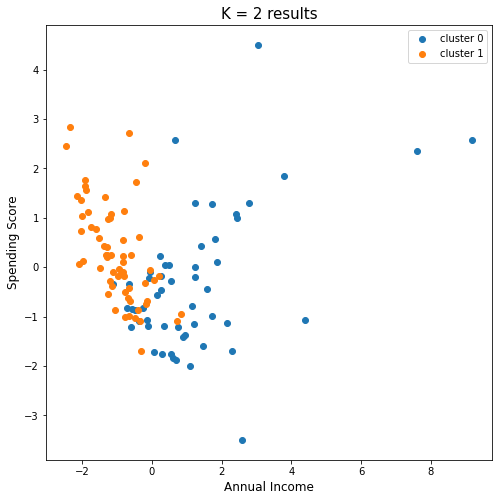

In [20]:
plt.figure(figsize = (8, 8))
k=2
for i in range(k):
    plt.scatter(result_hierarchy.loc[result_hierarchy['cluster'] == i, 'x'],
                result_hierarchy.loc[result_hierarchy['cluster'] == i, 'y'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('Annual Income', size = 12)
plt.ylabel('Spending Score', size = 12)
plt.show()

In [21]:
result

,x,y,cluster
0,-1.992785,0.125612,1
1,-1.328830,0.247930,1
2,-1.217244,0.992393,1
3,-1.199203,-0.272409,1
4,-0.898467,-0.143089,1
...,...,...,...
111,-0.651096,-0.334463,0
112,-1.267058,0.971953,1
113,-0.064035,-0.098318,0
114,-1.898629,1.562120,1


In [47]:
standard_data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,-0.579794,-0.816675,-1.239222,-0.728739,-0.614282,-0.932334,-0.070222,-0.545517,-0.341251
1,1.601821,-1.378751,-0.258299,-0.688038,-0.548240,-0.930413,-0.697350,-0.864214,-0.191224
2,1.539489,-0.891764,-0.302887,-0.550073,-0.464752,-0.454219,1.797998,-0.441660,0.058214
3,0.666843,-1.243303,-0.927110,-0.676965,-0.574210,-0.876021,-0.441945,-0.158867,1.142718
4,1.788816,-1.294601,-0.258299,-0.644743,-0.521081,-1.042682,-0.786881,-0.336352,0.694716
...,...,...,...,...,...,...,...,...,...
111,-0.766789,-0.146468,-0.258299,-0.666590,-0.534786,1.469335,0.281654,-0.305255,-0.773527
112,0.292852,-0.148468,0.098400,-0.546881,-0.435039,-0.741611,1.649470,-0.600299,-0.593717
113,0.479848,0.893855,-0.035362,-0.427172,-0.365106,1.825348,1.813843,-0.356320,-0.640491
114,0.916171,-0.398546,-0.704173,-0.717467,-0.585883,-0.086651,3.459038,-0.928577,-0.412832


In [59]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns

# create model and prediction
model_DESCAN = DBSCAN(eps=2,min_samples=2)
model_DESCAN.fit(standard_data)
model_DESCAN.fit_predict(standard_data)


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0, -1, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0, -1,  0,  0,  3, -1,  0,  3,  0, -1, -1,  3,
        0,  0, -1, -1, -1, -1,  2,  0,  4,  4,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0, -1, -1,  0,  0, -1,  1, -1],
      dtype=int64)

In [61]:
result_DESCAN = result
result_DESCAN['cluster'] = model_DESCAN.fit_predict(standard_data)
result_DESCAN

,x,y,cluster
0,-1.992785,0.125612,0
1,-1.328830,0.247930,0
2,-1.217244,0.992393,0
3,-1.199203,-0.272409,0
4,-0.898467,-0.143089,0
...,...,...,...
111,-0.651096,-0.334463,0
112,-1.267058,0.971953,0
113,-0.064035,-0.098318,-1
114,-1.898629,1.562120,1


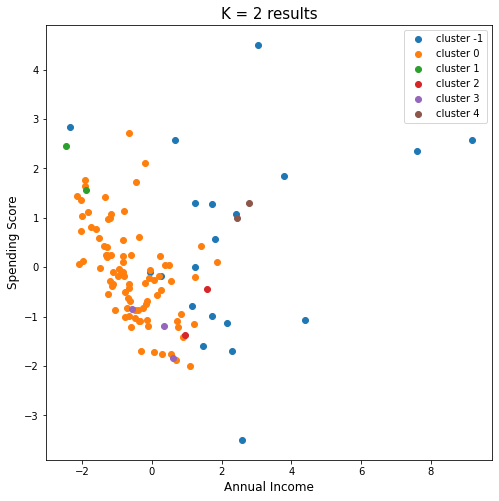

In [62]:
plt.figure(figsize = (8, 8))
k=2
for i in range(-1, result_DESCAN['cluster'].max() + 1):
    plt.scatter(result_DESCAN.loc[result_DESCAN['cluster'] == i, 'x'],
                result_DESCAN.loc[result_DESCAN['cluster'] == i, 'y'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('Annual Income', size = 12)
plt.ylabel('Spending Score', size = 12)
plt.show()